### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

## Practical activity: Scraping COVID data

**This is the solution to the activity.**

You work as a data analyst at a health insurance company. To provide up-to-date information for the executive, claims department, and clients, you are tasked with gathering the latest data on worldwide COVID-19 cases. 

Each department requires different information. For each continent on the list:
The executive needs to know:
- Total cases
- Total deaths

Claims needs to know:
- New cases
- New deaths
- Active cases
- Serious, Critical

Clients need to know:
- Total cases
- Total recovered
- Newly recovered

## 1. Import the libraries

In [1]:
# Import the necessary packages.
import requests
import pandas as pd
from bs4 import BeautifulSoup

## 2. Establish connection with URL

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x
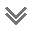

In [2]:
# Create a url variable.
url = 'https://www.worldometers.info/coronavirus/'

# Create a requests variable.
r = requests.get(url)

# Make contact with the website.
if r.status_code == 200:
    html_doc = r.text
    
# Get a BeautifulSoup object.
soup = BeautifulSoup(html_doc)

# Print the output.
print(soup.prettify())

## 3. Extract tabular data

In [3]:
# Extract the contents of the table with the table id. 
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

# View the table.
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

## 4. Extract table headers

In [4]:
# Specify BeautifulSoup to go through the table and find everything 
# with a tr tag.
# Note: th = (table header), tr = (table row), and td = table column
rows = table.find_all('tr', attrs={'style': ""})

# View the result.
rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>677,587,006</td>
 <td

In [5]:
# Store the extracted data.
output = []

column_names = ['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
               'New Deaths', 'Total Recovered', 'New Recovered',
               'Active Cases', 'Serious, Critical', 'Tot Cases/ 1M pop',
               'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population']

# Create a for loop statement.
for cases in rows:
    cases_data = cases.find_all("td")
    if cases_data:
        # Extract the text within each element.
        cases_text = [td.text for td in cases_data]
        output.append(dict(zip(column_names, cases_text)))
        
# Create an output.
output

[{'Country,Other': '',
  'Total Cases': 'World',
  'New Cases': '677,587,006',
  'Total Deaths': '+60,338',
  'New Deaths': '6,782,362',
  'Total Recovered': '+283',
  'New Recovered': '650,026,847',
  'Active Cases': '+68,630',
  'Serious, Critical': '20,777,797',
  'Tot Cases/ 1M pop': '41,234',
  'Deaths/ 1M pop': '86,928',
  'Total Tests': '870.1',
  'Tests/ 1M pop': '',
  'Population': ''},
 {'Country,Other': '1',
  'Total Cases': 'USA',
  'New Cases': '104,764,296',
  'Total Deaths': '',
  'New Deaths': '1,140,015                                ',
  'Total Recovered': '',
  'New Recovered': '101,991,199',
  'Active Cases': '',
  'Serious, Critical': '1,633,082',
  'Tot Cases/ 1M pop': '3,130',
  'Deaths/ 1M pop': '312,911',
  'Total Tests': '3,405',
  'Tests/ 1M pop': '1,161,863,110',
  'Population': '3,470,265'},
 {'Country,Other': '2',
  'Total Cases': 'India',
  'New Cases': '44,684,118',
  'Total Deaths': '',
  'New Deaths': '530,750                                ',
  'Total

## 5. Convert extracted data into a Panda DataFrame

In [6]:
# Create a DataFrame directly from the output.
data = pd.DataFrame(output)

# View the DataFrame.
data.head()

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,,World,"677,587,006","+60,338","6,782,362",+283,"650,026,847","+68,630","20,777,797","41,234","86,928",870.1,,
1,1,USA,"104,764,296",,"1,140,015",,"101,991,199",,"1,633,082","3,130","312,911","3,405","1,161,863,110","3,470,265"
2,2,India,"44,684,118",,"530,750",,"44,151,525",,"1,843",N/A,"31,767",377,"916,815,514","651,781"
3,3,France,"39,562,314",,"164,537",,"39,320,012",,"77,765",869,"603,226","2,509","271,490,188","4,139,547"
4,4,Germany,"37,907,312",,"166,763",,"37,514,100","+2,700","226,449",N/A,"451,904","1,988","122,332,384","1,458,359"
